<a href="https://colab.research.google.com/github/enghussienalinm/enghussienalinm/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import optimizers, datasets, layers,activations
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_x,train_y),(test_x,test_y)= datasets.cifar10.load_data()
test_x.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(10000, 32, 32, 3)

In [4]:
train_x.shape

(50000, 32, 32, 3)

In [5]:
test_x.shape

(10000, 32, 32, 3)

In [6]:
train_x=train_x.astype('float32')/255
test_x=test_x.astype('float32')/255

In [ ]:
print (train_x[0])


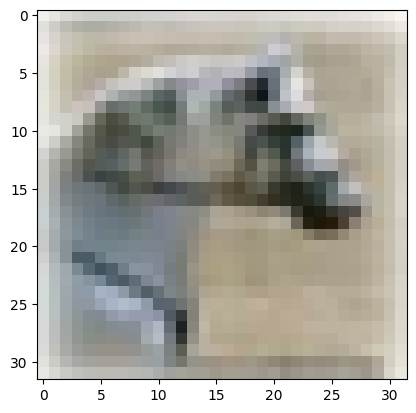

In [11]:
plt.imshow(train_x[4671])

In [12]:
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)

In [14]:
train_y[9]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [17]:
model=Sequential()

In [18]:
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=1,padding='same',activation=tf.nn.relu,input_shape=(32,32,3)))

In [19]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [20]:
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',activation=tf.nn.relu))

In [21]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [22]:
model.add(layers.Flatten())

In [23]:
model.add(layers.Dense(units=128,activation=tf.nn.relu))

In [24]:
model.add(layers.Dense(units=10,activation=tf.nn.softmax))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [26]:
hist=model.fit(x=train_x,y=train_y,batch_size=128,epochs=10)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 113s 283ms/step - accuracy: 0.3558 - loss: 1.7859
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 107s 272ms/step - accuracy: 0.5759 - loss: 1.2031
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 280ms/step - accuracy: 0.6370 - loss: 1.0360
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 274ms/step - accuracy: 0.6771 - loss: 0.9354
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 271ms/step - accuracy: 0.7044 - loss: 0.8557
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 105s 267ms/step - accuracy: 0.7208 - loss: 0.8055
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 105s 268ms/step - accuracy: 0.7413 - loss: 0.7475
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 265ms/step - accuracy: 0.7633 - loss: 0.6845
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 105s 268ms/step - accuracy: 0.7781 - loss: 0.6371
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 267ms/step - accuracy: 0.7936 - loss: 0.5922


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,639,904 (6.26 MB)

 Trainable params: 546,634 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,093,270 (4.17 MB)